<a href="https://colab.research.google.com/github/eric1645/CSE--/blob/main/HW06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, identity
from scipy.sparse import csr_matrix

#내부 격자 설정
n = 50
h = 1 / (n+1)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)
X, Y = np.meshgrid(x, y, indexing="ij")

# f(x,y)
f = np.sin(np.pi*X) * np.sin(np.pi*Y)
b = (h**2)*(f.flatten())

# matrix A
T_1 = diags([np.ones(n-1),-4*np.ones(n),np.ones(n-1)], [-1, 0, 1], shape=(n,n))
T_2 = diags([np.ones(n-1), np.ones(n-1)], [-1, 1], shape=(n,n))
I = identity(n)
A = kron(I, T_1) + kron(T_2, I)

def jacobi(A, b, tol=1e-6, max_iter=5000):
  D = diags(A.diagonal())
  R = A - D
  D_inv = diags(1/A.diagonal())
  x = np.zeros_like(b)
  for i in range(max_iter):
    x_new = D_inv @ (b - R @ x)
    if np.linalg.norm(x_new - x, ord=np.inf) < tol:
      return x_new, i, np.linalg.norm(x_new - x, ord=np.inf)
    x = x_new
  return x, max_iter

def gauss(A, b, tol=1e-6, max_iter=5000):
  x = np.zeros_like(b)
  A = csr_matrix(A)
  for i in range(max_iter):
    x_new = np.copy(x)
    for j in range(A.shape[0]):
      row_start = A.indptr[j]
      row_end = A.indptr[j+1]
      Ai = A.indices[row_start:row_end]
      Av = A.data[row_start:row_end]
      x_new[j] = (b[j] - np.dot(Av, x_new[Ai]) + A[j,j]*x_new[j]) / A[j,j]
    if np.linalg.norm(x_new - x, ord=np.inf) < tol:
      return x_new, i, np.linalg.norm(x_new - x, ord=np.inf)
    x = x_new
  return x, max_iter

def SOR(A, b, omega=1.9, tol=1e-6, max_iter=5000):
  x = np.zeros_like(b)
  A = csr_matrix(A)
  for i in range(max_iter):
    x_new = np.copy(x)
    for j in range(A.shape[0]):
      row_start = A.indptr[j]
      row_end = A.indptr[j+1]
      Ai = A.indices[row_start:row_end]
      Av = A.data[row_start:row_end]
      x_new[j] = (1-omega)*x[j] +omega*(b[j] - np.dot(Av, x_new[Ai]) + A[j,j]*x_new[j]) / A[j,j]
    if np.linalg.norm(x_new - x, ord=np.inf) < tol:
      return x_new, i,  np.linalg.norm(x_new - x, ord=np.inf)
    x = x_new
  return x, max_iter

#결과 저장
u_j, it_j, norm_j = jacobi(A,b)
u_g, it_g, norm_g = gauss(A,b)
u_s, it_s, norm_s = SOR(A,b)

#계산횟수 출력
print(f"Jacobi: {it_j} iterations")
print(f"Gauss-Seidel: {it_g} iterations")
print(f"SOR: {it_s} iterations")

#norm of residual 계산
print(f"Jacobi norm of residual: {norm_j}")
print(f"Gauss-Seidel norm of residual: {norm_g}")
print(f"SOR norm of residual: {norm_s}")

#exact solution
u_exact = -(1/(2*np.pi**2))*(np.sin(np.pi*X)*np.sin(np.pi*Y)).flatten()

#error 계산
error_j = np.linalg.norm(u_j - u_exact)
error_g = np.linalg.norm(u_g - u_exact)
error_s = np.linalg.norm(u_s - u_exact)

print(f"Jacobi error: {error_j}")
print(f"Gauss-Seidel error: {error_g}")
print(f"SOR error: {error_s}")


Jacobi: 2405 iterations
Gauss-Seidel: 1386 iterations
SOR: 102 iterations
Jacobi norm of residual: 9.987911843770125e-07
Gauss-Seidel norm of residual: 9.974044652139025e-07
SOR norm of residual: 7.082424889779879e-07
Jacobi error: 0.013007034164258151
Gauss-Seidel error: 0.006275099570437602
SOR error: 0.0003967308860168633


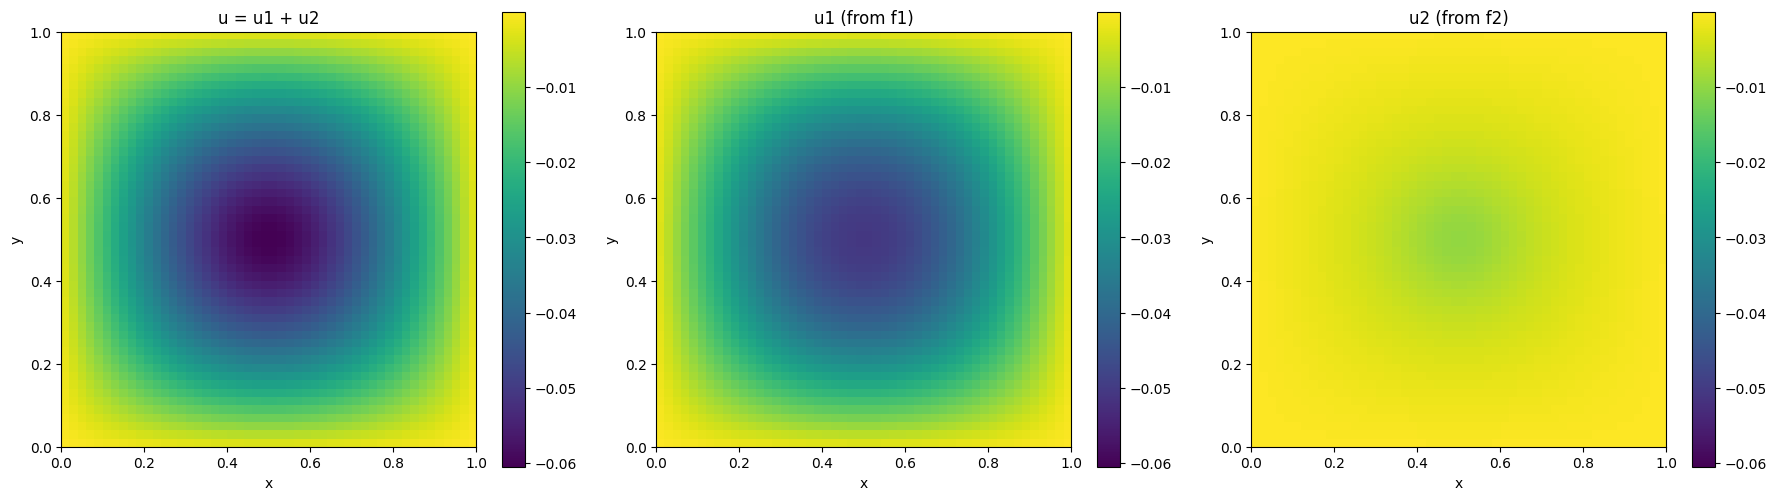

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, identity
from scipy.sparse import csr_matrix

#내부 격자 설정
n = 50
h = 1 / (n+1)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)
X, Y = np.meshgrid(x, y, indexing="ij")

# f(x,y)
f1 = np.sin(np.pi*X)*np.sin(np.pi*Y)
f2 = np.exp(-100*((X-0.5)**2+(Y-0.5)**2))
f = f1 + f2
b1 = (h**2)*(f1.flatten())
b2 = (h**2)*(f2.flatten())
b = (h**2)*(f.flatten())

# matrix A
T_1 = diags([np.ones(n-1),-4*np.ones(n),np.ones(n-1)], [-1, 0, 1], shape=(n,n))
T_2 = diags([np.ones(n-1), np.ones(n-1)], [-1, 1], shape=(n,n))
I = identity(n)
A = kron(I, T_1) + kron(T_2, I)

def SOR(A, b, omega=1.9, tol=1e-6, max_iter=5000):
  x = np.zeros_like(b)
  A = csr_matrix(A)
  for i in range(max_iter):
    x_new = np.copy(x)
    for j in range(A.shape[0]):
      row_start = A.indptr[j]
      row_end = A.indptr[j+1]
      Ai = A.indices[row_start:row_end]
      Av = A.data[row_start:row_end]
      x_new[j] = (1-omega)*x[j] +omega*(b[j] - np.dot(Av, x_new[Ai]) + A[j,j]*x_new[j]) / A[j,j]
    if np.linalg.norm(x_new - x, ord=np.inf) < tol:
      return x_new
    x = x_new
  return x

#결과 저장
u = SOR(A,b)
u1 = SOR(A, b1)
u2 = SOR(A, b2)

# 공통 vmin, vmax 계산
u_all = [u, u1, u2]
umin = min([np.min(ui) for ui in u_all])
umax = max([np.max(ui) for ui in u_all])

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# u
im0 = axs[0].imshow(u.reshape(n, n), origin='lower', extent=[0,1,0,1],
                    cmap='viridis', vmin=umin, vmax=umax)
axs[0].set_title('u = u1 + u2')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
plt.colorbar(im0, ax=axs[0])

# u1
im1 = axs[1].imshow(u1.reshape(n, n), origin='lower', extent=[0,1,0,1],
                    cmap='viridis', vmin=umin, vmax=umax)
axs[1].set_title('u1 (from f1)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.colorbar(im1, ax=axs[1])

# u2
im2 = axs[2].imshow(u2.reshape(n, n), origin='lower', extent=[0,1,0,1],
                    cmap='viridis', vmin=umin, vmax=umax)
axs[2].set_title('u2 (from f2)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
plt.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


max error =  5.284844259150368e-06


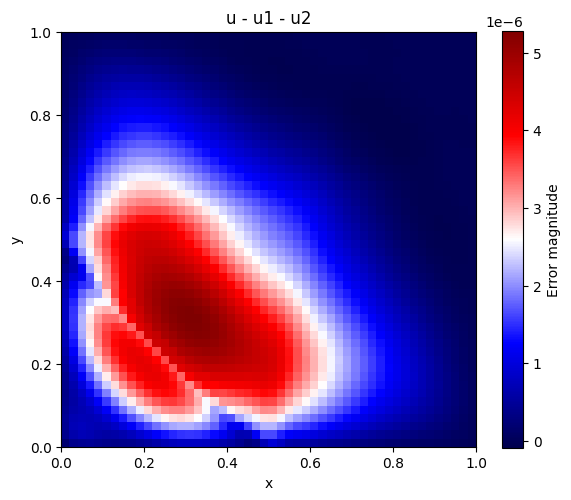

In [ ]:
# u - u1 - u2 계산
error = u - u1 - u2
error_2D = error.reshape(n, n)

# 오차의 최대값 출력
print("max error = ", np.max(np.abs(error)))

# 오차 시각화
plt.figure(figsize=(6, 5))
plt.imshow(error_2D, origin='lower', extent=[0, 1, 0, 1], cmap='seismic')
plt.colorbar(label='Error magnitude')
plt.title('u - u1 - u2')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse import csr_matrix

def make_A(N):
    main_diag = -4*np.ones(N)
    off_diag  = np.ones(N-1)
    T_1 = diags([off_diag, main_diag, off_diag], [-1,0,1], shape=(N,N))
    T_2 = diags([off_diag, off_diag], [-1,1], shape=(N,N))
    I = identity(N)
    A = kron(I, T_1) + kron(T_2, I)
    return A

N = 3  # 내부 격자 3x3 (총 9개 unknown)
A = make_A(N)
A_csr = csr_matrix(A)

print(A_csr.indptr)
print(A_csr.indices)
print(A_csr.data)
print(A.shape[0])

row_start = A_csr.indptr[0]
row_end = A_csr.indptr[1]
Ai = A_csr.indices[row_start:row_end]
Av = A_csr.data[row_start:row_end]
print(Ai)
print(Av)
print(A_csr.indptr[1])

[ 0  6 12 18 27 36 45 51 57 63]
[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 6 7 8 0 1 2 3 4 5 6 7 8 0
 1 2 3 4 5 6 7 8 3 4 5 6 7 8 3 4 5 6 7 8 3 4 5 6 7 8]
[-4.  1.  0.  1.  0.  0.  1. -4.  1.  0.  1.  0.  0.  1. -4.  0.  0.  1.
  1.  0.  0. -4.  1.  0.  1.  0.  0.  0.  1.  0.  1. -4.  1.  0.  1.  0.
  0.  0.  1.  0.  1. -4.  0.  0.  1.  1.  0.  0. -4.  1.  0.  0.  1.  0.
  1. -4.  1.  0.  0.  1.  0.  1. -4.]
9
[0 1 2 3 4 5]
[-4.  1.  0.  1.  0.  0.]
6


In [ ]:
import numpy as np

A = np.array([[1,2,3],
               [4, 5, 6]])

print(A.shape[0])
print(A.flatten())

2
[1 2 3 4 5 6]
